In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Final-data_with_SSC.csv')

In [3]:
df.head()

,school,sex,age,reason,traveltime,studytime,failures,activities,freetime,health,absences,Subject,Final_Score,ses_status,avg_alc,social_score_category
0,GP,F,18,course,2,2,0,no,3,3,6,1,6.0,Low,1.0,Neutral
1,GP,F,17,course,1,2,0,no,3,3,4,1,5.0,Low,1.0,Neutral
2,GP,F,15,other,1,2,3,no,3,3,10,1,8.0,High,2.5,Very Bad
3,GP,F,15,home,1,3,0,yes,2,5,2,1,15.0,High,1.0,Very Bad
4,GP,F,16,home,1,2,0,no,3,5,4,1,9.0,Medium,1.5,Very Bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school                 1044 non-null   object 
 1   sex                    1044 non-null   object 
 2   age                    1044 non-null   int64  
 3   reason                 1044 non-null   object 
 4   traveltime             1044 non-null   int64  
 5   studytime              1044 non-null   int64  
 6   failures               1044 non-null   int64  
 7   activities             1044 non-null   object 
 8   freetime               1044 non-null   int64  
 9   health                 1044 non-null   int64  
 10  absences               1044 non-null   int64  
 11  Subject                1044 non-null   int64  
 12  Final_Score            1044 non-null   float64
 13  ses_status             1044 non-null   object 
 14  avg_alc                1044 non-null   float64
 15  soci

In [5]:
num_var = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'absences', 'avg_alc', 'Final_Score']

In [6]:
cat_var = ['school', 'sex', 'reason', 'activities', 'health', 'Subject', 'ses_status', 'social_score_category'] 

# Vizualisation

## Box Plots

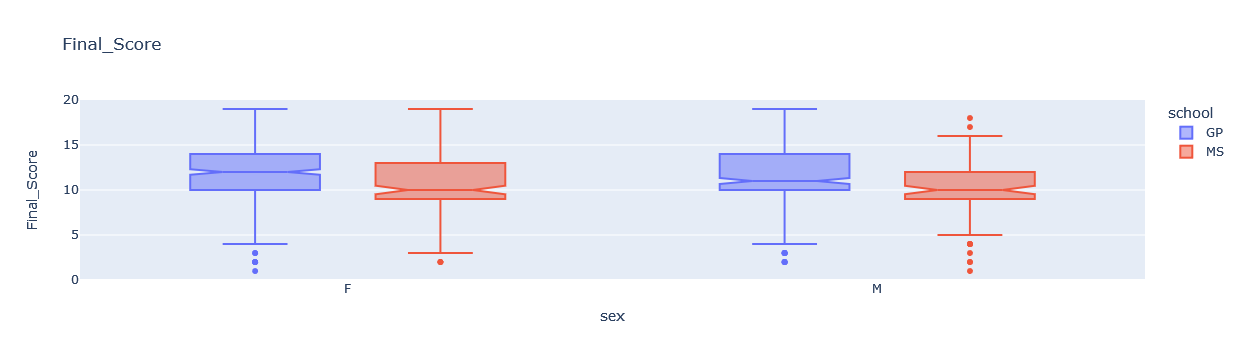

In [9]:
fig = px.box(df, x="sex", y="Final_Score", color="school",
             notched=True, # used notched shape
             title="Final_Score",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

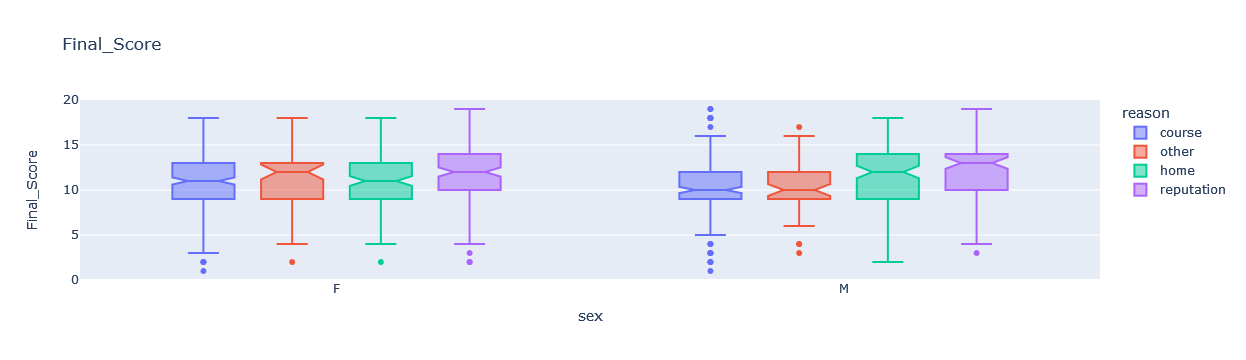

In [10]:
fig = px.box(df, x="sex", y="Final_Score", color="reason",
             notched=True, # used notched shape
             title="Final_Score",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

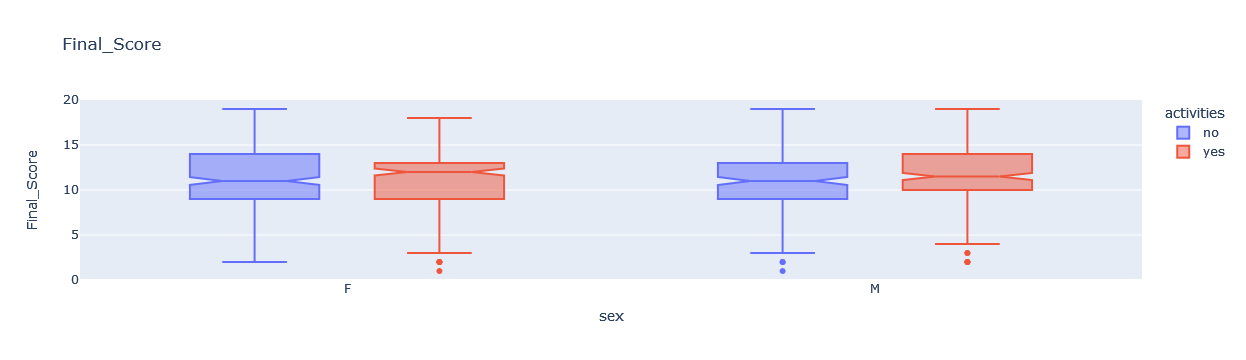

In [11]:
fig = px.box(df, x="sex", y="Final_Score", color="activities",
             notched=True, # used notched shape
             title="Final_Score",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

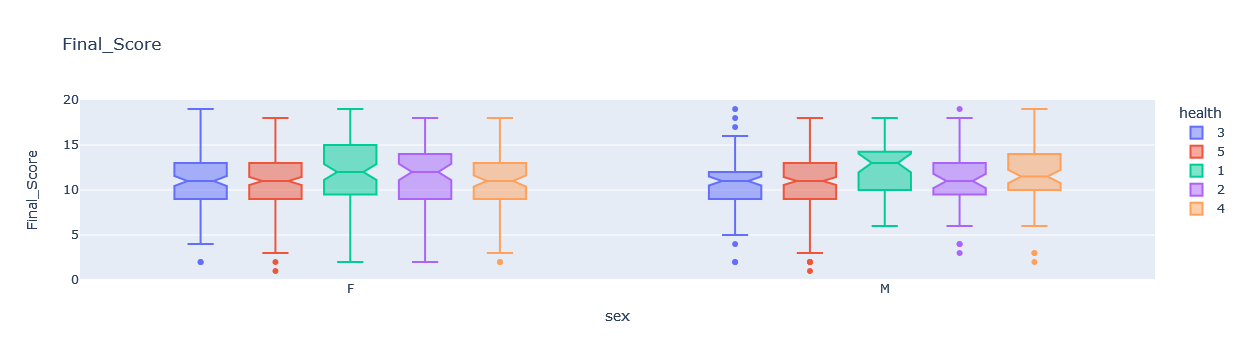

In [12]:
fig = px.box(df, x="sex", y="Final_Score", color="health",
             notched=True, # used notched shape
             title="Final_Score",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

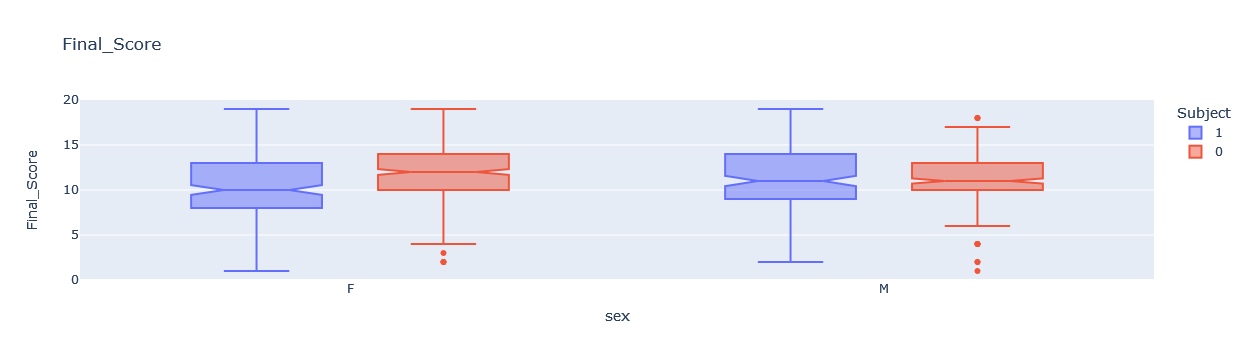

In [14]:
fig = px.box(df, x="sex", y="Final_Score", color="Subject",
             notched=True, # used notched shape
             title="Final_Score",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

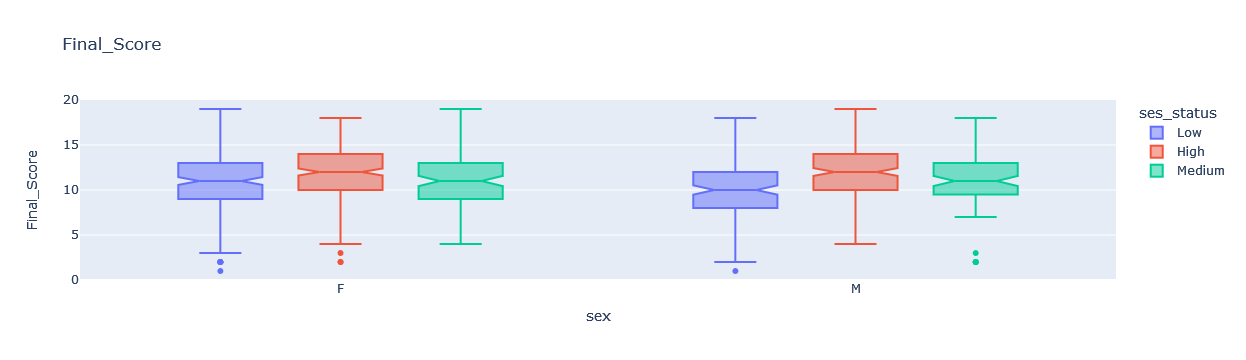

In [15]:
fig = px.box(df, x="sex", y="Final_Score", color="ses_status",
             notched=True, # used notched shape
             title="Final_Score",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

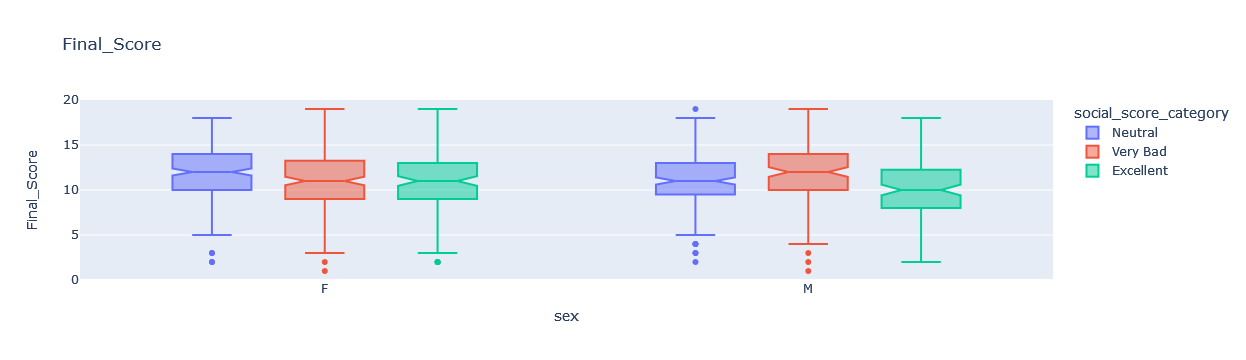

In [16]:
fig = px.box(df, x="sex", y="Final_Score", color="social_score_category",
             notched=True, # used notched shape
             title="Final_Score",
             #hover_data=["day"] # add day column to hover data
            )
fig.show()

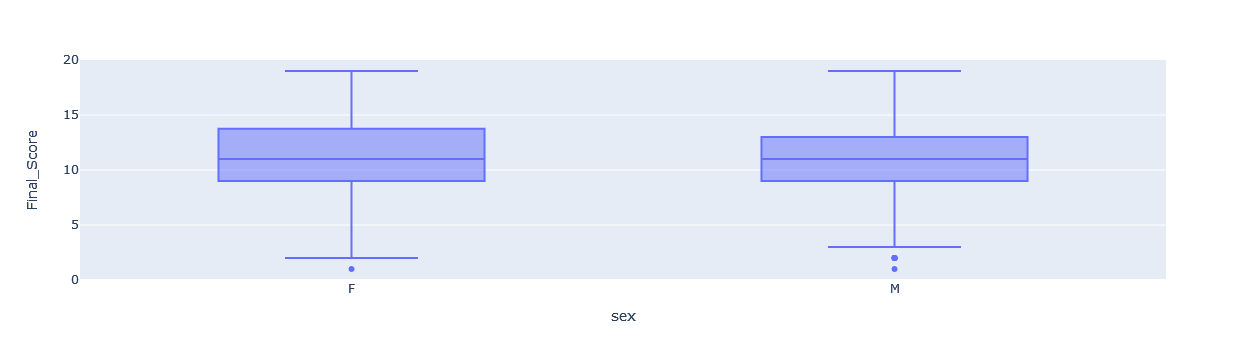

In [17]:
fig = px.box(df, x="sex", y="Final_Score")
fig.show()

### sex  does not seem to be important 

# Distribution

In [18]:
num_var = ['age', 'traveltime', 'studytime', 'failures', 'freetime', 'absences', 'avg_alc', 'Final_Score']

In [ ]:
x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

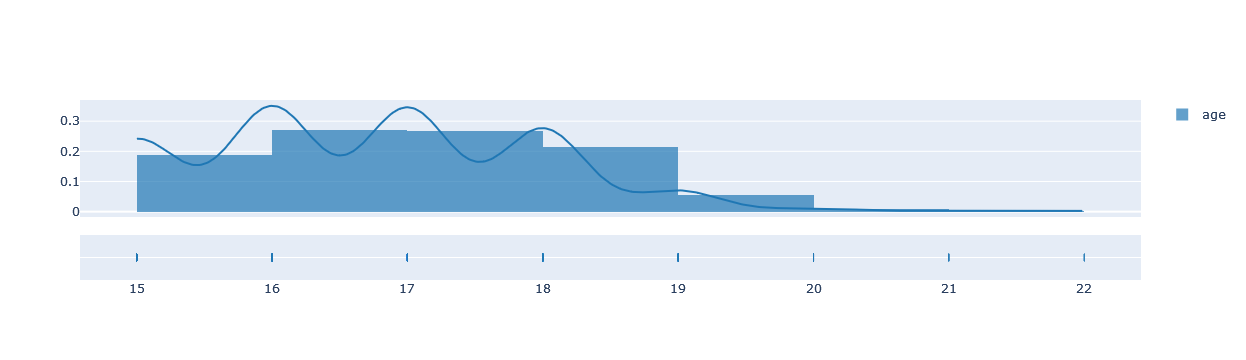

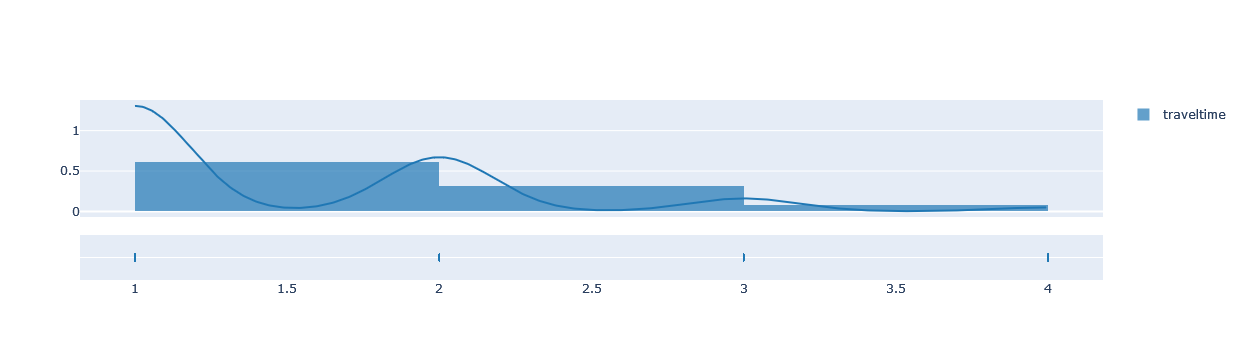

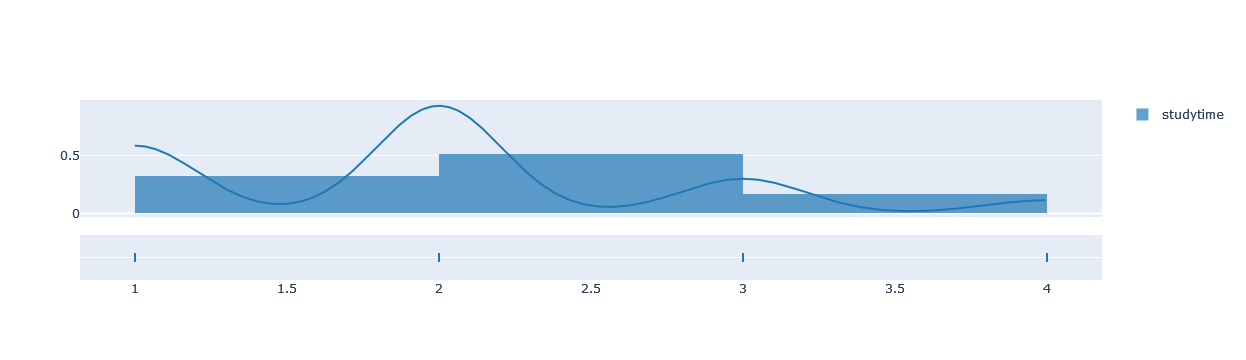

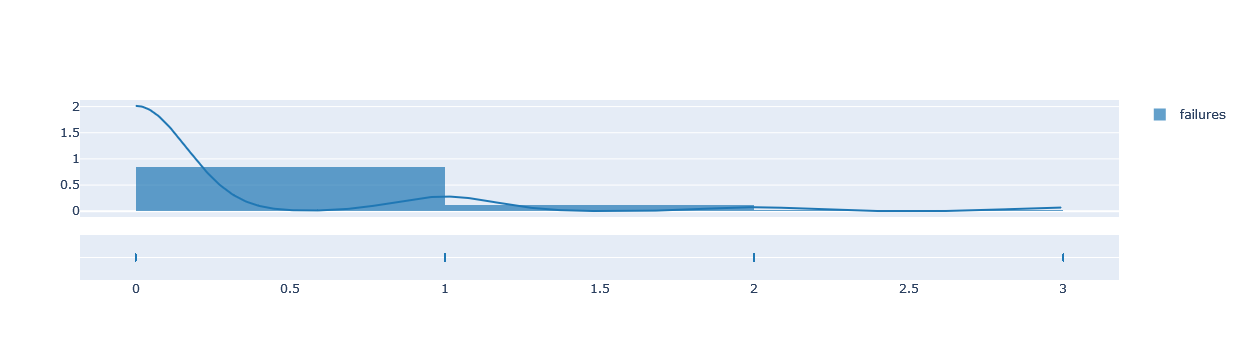

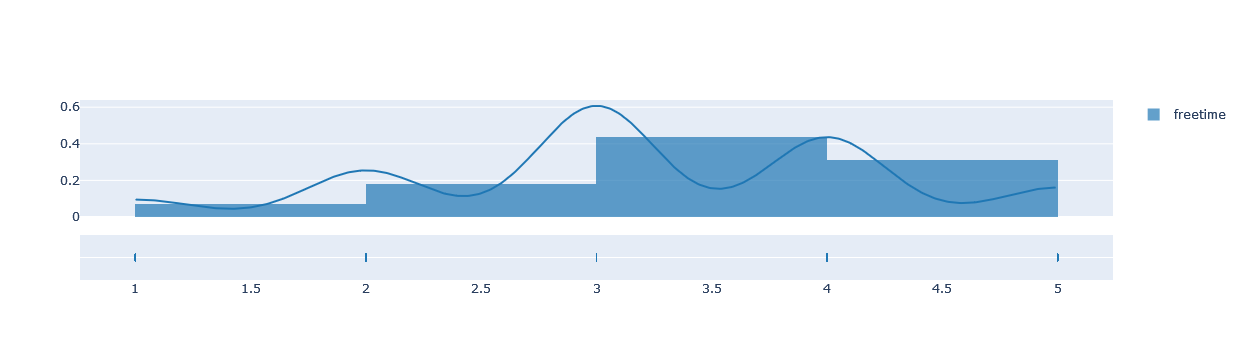

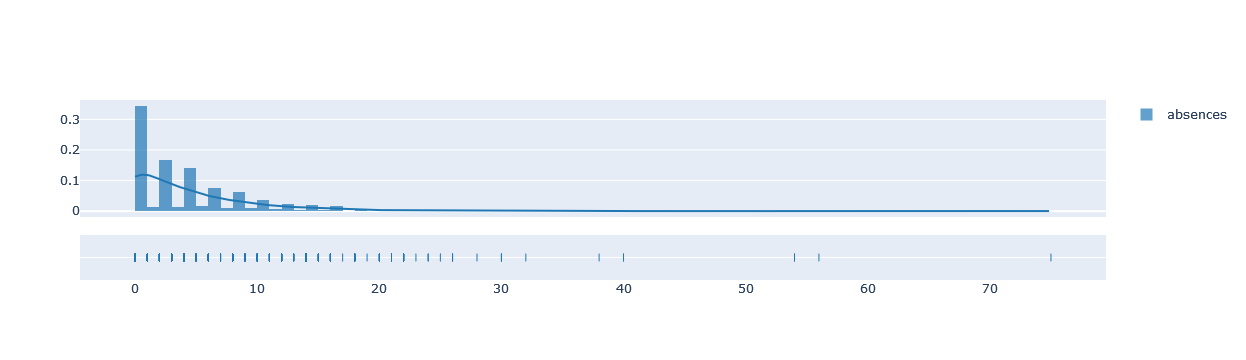

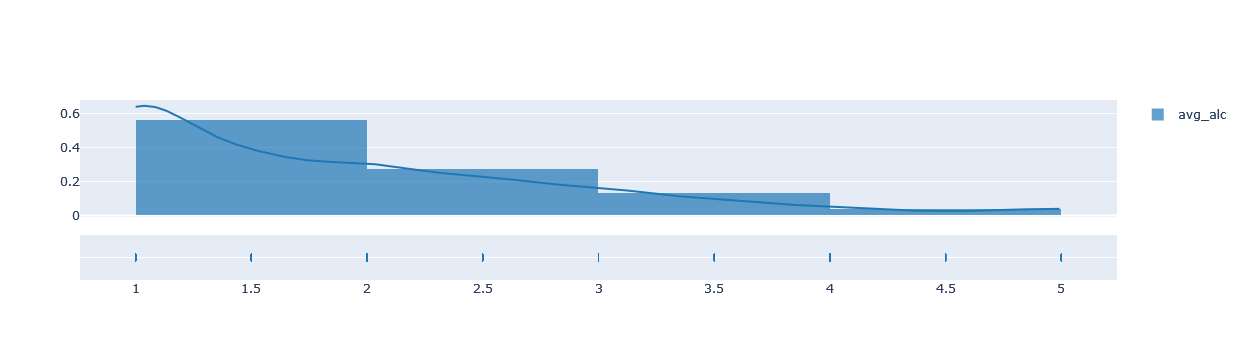

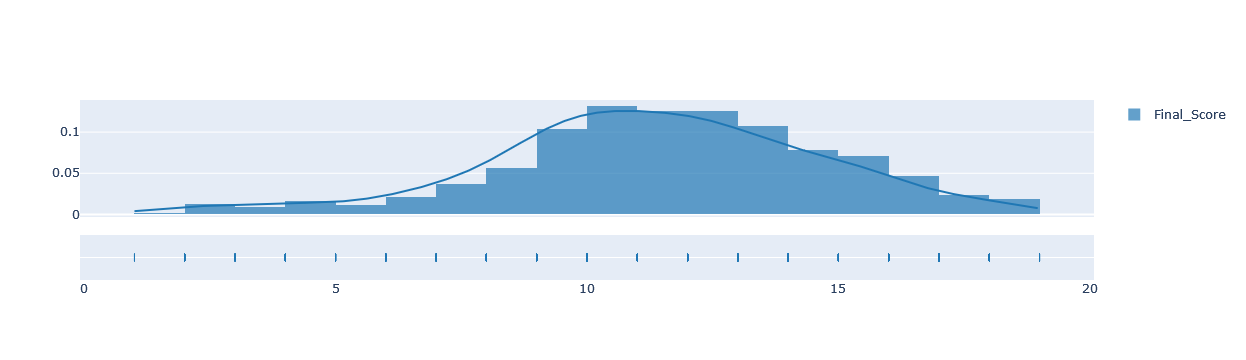

In [26]:
for var in num_var:
    hist_data = [df[var]]
    group_labels = [var] # name of the dataset
    fig = ff.create_distplot(hist_data, group_labels)
    fig.show()

In [38]:
cat_var = ['school', 'sex', 'reason', 'activities', 'ses_status', 'social_score_category'] 

In [39]:
for var in cat_var:
    print(f'\n{df[var].value_counts()}')


GP    772
MS    272
Name: school, dtype: int64

F    591
M    453
Name: sex, dtype: int64

course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64

no     528
yes    516
Name: activities, dtype: int64

High      468
Low       358
Medium    218
Name: ses_status, dtype: int64

Neutral      449
Very Bad     333
Excellent    262
Name: social_score_category, dtype: int64


In [140]:
def encod(df):
    # List of columns to encode
    columns_to_encode = ['reason']

    # Perform one-hot encoding on the columns
    encoded_columns = pd.get_dummies(df[columns_to_encode], prefix=columns_to_encode)

    # Concatenate the encoded columns to the original DataFrame
    df = pd.concat([df, encoded_columns], axis=1)

    # Remove the original columns from the DataFrame
    df.drop(columns_to_encode, axis=1, inplace=True)
    
    df['school'].replace({'GP': 1, 'MS': 0}, inplace=True)
    df['sex'].replace({'F': 1, 'M': 0}, inplace=True)
    df['activities'].replace({'no': 0, 'yes': 1}, inplace=True)
    df['ses_status'].replace({'Low': 1, 'Medium': 2, 'High':3}, inplace=True)
    df['social_score_category'].replace({'Very Bad': 1, 'Neutral': 2, 'Excellent':3}, inplace=True)
    
    return df

In [141]:
df_encoded = encod(df)
df_encoded.head()

,school,sex,age,traveltime,studytime,failures,activities,freetime,health,absences,Subject,Final_Score,ses_status,avg_alc,social_score_category,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,2,2,0,0,3,3,6,1,6.0,1,1.0,2,1,0,0,0
1,1,1,17,1,2,0,0,3,3,4,1,5.0,1,1.0,2,1,0,0,0
2,1,1,15,1,2,3,0,3,3,10,1,8.0,3,2.5,1,0,0,1,0
3,1,1,15,1,3,0,1,2,5,2,1,15.0,3,1.0,1,0,1,0,0
4,1,1,16,1,2,0,0,3,5,4,1,9.0,2,1.5,1,0,1,0,0


## feature importances with Random Forest 

In [142]:
X= df_encoded.drop(["Final_Score"], axis = 'columns')
y = df_encoded['Final_Score']

In [146]:
rf = RandomForestRegressor(random_state=1)

In [164]:
model = rf.fit(X, y)

In [148]:
print("Score : {:.3f}".format(rf.score(X, y)))

Score : 0.901


In [163]:
y_pred_rf = rf.predict(X)
rf_mse = mean_squared_error(y, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

1.0333802725427332

In [165]:
model.feature_importances_

array([0.02550958, 0.02946166, 0.07337671, 0.03848117, 0.05998584,
       0.17644527, 0.02609335, 0.06992189, 0.06923057, 0.13427501,
       0.04451396, 0.04607158, 0.07996175, 0.04819901, 0.02499693,
       0.01994118, 0.01240459, 0.02112997])

Text(0.5, 0, 'Random Forest Feature Importance')

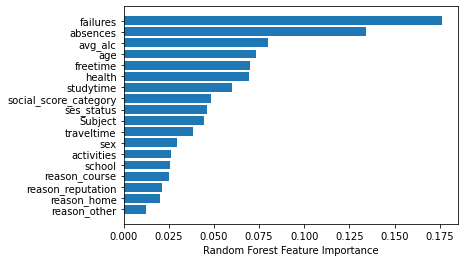

In [170]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Feature Importance Computed with SHAP Values

In [167]:
Predictors = X.columns

In [168]:
import shap
shap.initjs()

In [171]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

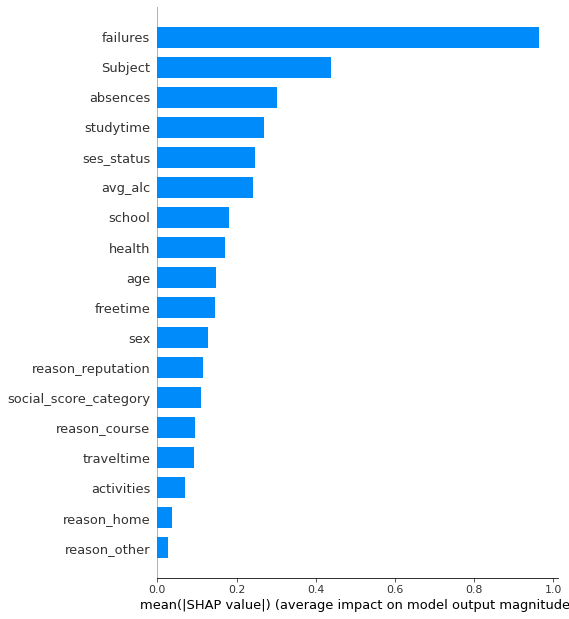

In [172]:
shap.summary_plot(shap_values, X, plot_type="bar")

## The feature importance with more details, showing the feature value:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


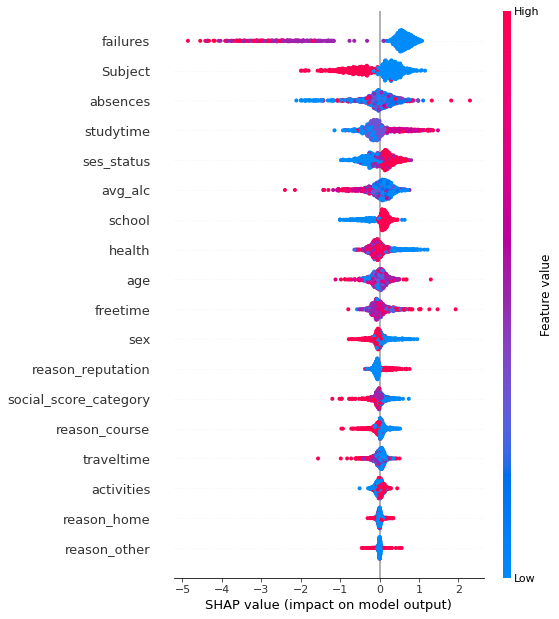

In [173]:
shap.summary_plot(shap_values, X)